In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('../dataset/wiki/opinions_preprocessed.csv')
print(ds.shape)

(12104, 14)


# descriptive statistics by language

In [3]:
ds.lang.unique()

array(['es', 'en'], dtype=object)

In [8]:
group = ds.groupby('lang')
group = group.agg({'page_id':'nunique', 'contributor': 'nunique', 'revision_uid':'nunique', 'turn_uid':'nunique', 'text':'count'}).reset_index()
group.rename(columns={'page_id': 'pages', 'contributor': 'editors', 'text': 'opinions',
                     'revision_uid': 'revisions', 'turn_uid':'turns'}, inplace=True)
group.to_csv('../results/ds_stats.csv', index=False)
group.head()

,lang,pages,editors,revisions,turns,opinions
0,en,22,279,673,1067,4179
1,es,17,449,1612,2122,7925


# distribution of opinions by topics

most active talk pages

In [10]:
group=ds.groupby(['page_title']).size()
group = group.reset_index()
group.columns = ['page_title', 'num_revisions']
group = group.sort_values('num_revisions', ascending=False)
group.rename(columns={'page_title':'page title', 'num_revisions': 'opinions'}, inplace=True)
group.to_csv('../results/ds_most_discussions.csv', index=False)
group.head()

,page title,opinions
10,Discusión:Mauricio Macri,4180
20,Talk:Donald Trump,1914
3,Discusión:Enrique Peña Nieto,1231
29,Talk:Justin Trudeau,673
2,Discusión:Donald Trump,648


next, we show the number of opinions by topic for each language.

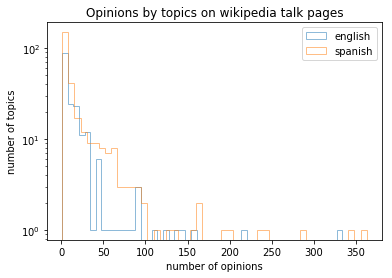

In [11]:
group = ds[ds.lang=='en'].groupby('topic').size()
plt.hist(group,bins=50, alpha=0.5, label='english',histtype='step')
#group.plot(kind='kde')
group = ds[ds.lang=='es'].groupby('topic').size()
plt.hist(group,bins=50, alpha=0.5, label='spanish',histtype='step')
#group.plot(kind='kde')
plt.yscale('log')
plt.xlabel('number of opinions')
plt.ylabel('number of topics')
plt.legend(loc='upper right')
plt.title('Opinions by topics on wikipedia talk pages')
plt.savefig('../results/opinion_topics_dist.eps', format='eps')

PENDING: show the number of opinions in both languages for groups of countries by native language (USA, CAN,.. --> english) (MEX, COL, ECU... --> spanish)